# Competition 1 #

#### Research Question & Goal ####

What are the determinants of the IPO underpricing phenomena? It is our job as a group to understand and identify the underlying determinants that factor into IPO underpricing.

### Business Understanding ###

According to Investopedia.com, Underpricing is the listing of an intial public offering (IPO) below its market value. When the offer price of the stock is lower than the price of the first trade, the stock is considered to be underpriced. This will only last for a short amount of time, as the demand of the stock is going to drive it back up to its value.

From a company standpoint, they wish to have the intial public offering as high as possible, which in turn raises the most capital. The quantitative factors that go into an initial public offering are all financial analysis reports from the company itself. Before the IPO, the company will be analyzed by its sales, expenses, earnings, and cash flow. Furthermore, a company's earnings and expected earnings growth are the biggest factors in the IPO. Marketability in a specific industry and the general market also can drive an IPO up or down.

Once the investment bankers or IPO underwriters determine the IPO price of the company's stock, the day before the stock is offered publically, the company will market the IPO to potential investors. For historical purposes, IPOs are viewed as risky investments because of the lack of historical data that is collected on them. The less liquidity that the stock/company has and predicatble IPO shares are going to be, the more likely they are going to be underprices to compensate for assumed risk. Company's also underprice their IPO to entice more investors to buy stocks to raise more capital.

With all of this information about intial public offerings, is there a few determinants that can be identified as to why the phenomenon of underpricing exists? The dataset that we have been provided provide information about companies and information regarding their IPO, such as IPO Offering, IPO Characteristics, Textual Characterisitics, Sentiment Characteristics, Target Variables, Control Variables, and IPO Identifiers.

The variables that have been provided are listed below:

 - P(PHO) - Offer Price
 - P(H) - Price Range Higher Bound
 - P(L) - Price Range Lower Bound
 - P(1Day) - First Day Trading Price
 - C1 - Days
 - C2 - Top-Tier Dummy
 - C3 - Earnings per Share
 - C4 - Prior NASDAQ 15-Day Returns
 - C5 - Outstanding Shares
 - C6 - Offering Shares
 - C7 - Sales
 - T1 - Number of Sentences
 - T2 - Number of Words
 - T3 - Number of Real Words
 - T4 - Number of Long Sentences
 - T5 - Number of Long Words
 - S1 - Number of Positive Words
 - S2 - Number of Negative Words
 - S3 - Number of Uncertain Words
 - Y1 - Pre-IPO Price Revision
 - Y2 - Post-IPO Initial Return
 - C3' - Positive EPS Dummy
 - C5' - Share Overhang
 - C6' - Up Revision
 - I1 - Ticker
 - I2 - Company Name
 - I3 - Standard Industry Classifier

## Data Understanding ##

In [17]:
# Importing useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the .xlsx datafile and converting into a DataFrame
data = pd.read_excel("Competition1_raw_data.xlsx",header=0,na_values="-")
df_data = pd.DataFrame(data)

In [3]:
# Understanding the datatypes for the features
print(df_data.head())

     I1                                  I2    I3  P(IPO)  P(H)  P(L)  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674    10.0   9.5   8.5   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834     8.0  10.0   8.0   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834     7.0  14.0  12.0   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834    11.5  16.0  14.0   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492    21.0  21.0  19.0   

     P(1Day)     C1   C2    C3  ...            C6       C7     T1       T2  \
0  11.870000  122.0  1.0  3.43  ...    10600000.0   51.345  470.0  12719.0   
1   7.250000  259.0  0.0 -1.62  ...     2400000.0   25.936  791.0  21792.0   
2   6.700000   90.0  1.0 -1.24  ...     5000000.0    7.378  201.0   5262.0   
3  12.390000  209.0  1.0 -0.91  ...     4500000.0    8.526  328.0   8259.0   
4  56.599998   80.0  1.0  0.07  ...     8250000.0  632.298  572.0  14830.0   

        T3     T4      T5    S1     S2     S3  
0  11560.0  301.0   690.0  62.0  117.0  139.

__We will remove the column headers that have parentheses in them to underscores, as it will be easier to reference those columns.__

In [4]:
# Renaming Column Headers with '()' in it
cols = ['I1','I2','I3','P_IPO','P_H','P_L','P_1Day','C1','C2','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']

# Define columns of 'df_data' using 'cols'
df_data.columns = cols

# Displaying the first 5 rows of dataframe 'df_data'
# it should show 22 columns
print(df_data.head())

     I1                                  I2    I3  P_IPO   P_H   P_L  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674   10.0   9.5   8.5   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834    8.0  10.0   8.0   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834    7.0  14.0  12.0   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834   11.5  16.0  14.0   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492   21.0  21.0  19.0   

      P_1Day     C1   C2    C3  ...            C6       C7     T1       T2  \
0  11.870000  122.0  1.0  3.43  ...    10600000.0   51.345  470.0  12719.0   
1   7.250000  259.0  0.0 -1.62  ...     2400000.0   25.936  791.0  21792.0   
2   6.700000   90.0  1.0 -1.24  ...     5000000.0    7.378  201.0   5262.0   
3  12.390000  209.0  1.0 -0.91  ...     4500000.0    8.526  328.0   8259.0   
4  56.599998   80.0  1.0  0.07  ...     8250000.0  632.298  572.0  14830.0   

        T3     T4      T5    S1     S2     S3  
0  11560.0  301.0   690.0  62.0  117.0  139.0  
1 

In [15]:
# Describing the Data
print(df_data.describe())

            P_IPO         P_H         P_L       P_1Day           C1  \
count  677.000000  672.000000  672.000000   660.000000   660.000000   
mean    13.837666   15.481190   13.515045    25.934766   149.728788   
std      6.053731    6.653429    5.835646    73.234948   152.817467   
min      3.000000    0.000000    3.000000     0.000000    10.000000   
25%     10.000000   12.500000   11.000000    11.000000    85.000000   
50%     13.500000   15.000000   13.000000    14.845000   107.000000   
75%     17.000000   17.000000   15.000000    20.485000   155.250000   
max     85.000000  135.000000  108.000000  1159.200562  2087.000000   

               C2           C3          C4            C5            C6  \
count  660.000000   646.000000  660.000000  6.760000e+02  6.760000e+02   
mean     0.859091     1.788904    0.007282  4.935776e+07  1.241519e+07   
std      0.348192   162.666532    0.033318  1.043764e+08  2.512855e+07   
min      0.000000  -786.239000   -0.162352  3.693227e+06  5.2500

In [16]:
# Defining the Data Types of the Data
print(df_data.dtypes)

I1         object
I2         object
I3         object
P_IPO     float64
P_H       float64
P_L       float64
P_1Day    float64
C1        float64
C2        float64
C3        float64
C4        float64
C5        float64
C6        float64
C7        float64
T1        float64
T2        float64
T3        float64
T4        float64
T5        float64
S1        float64
S2        float64
S3        float64
dtype: object


### Understanding Missing Values ###

Upon intial investigation, there seem to be no missing values, which is great.

But doing some further digging, there are missing values, but the 'for loop', it does not pick up on dashes/hyphens. To show that there are missing values in the dataset.

In [38]:
# Creating an empty list for column names
names = []

# Creating an empty list for the number of null values in each column
values = []

# Checking for Missing Values
for col in df_data.columns:
    names.append(col)
    values.append(df_data[col].isnull().sum())
    print(names[-1],values[-1])

I1 0
I2 0
I3 8
P(IPO) 5
P(H) 10
P(L) 10
P(1Day) 22
C1 22
C2 22
C3 36
C4 22
C5 6
C6 6
C7 72
T1 1
T2 1
T3 1
T4 1
T5 1
S1 1
S2 1
S3 1


Text(0, 0.5, 'Count of Missing Value')

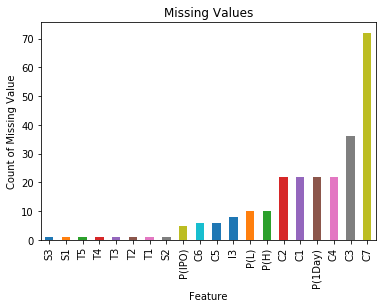

In [45]:
# Creating a graph to visulize missing values
missing_values = df_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()

# Adding peripherials to graph
plt.title('Missing Values')
plt.xlabel('Feature')
plt.ylabel('Count of Missing Value')

##### More Missing Values ####

There are only two columns `I1` and `I2` that do not have any "hyphens" or missing values.

The issue that we have now is how to deal with these missing values.

It is unique to see that columns `T1` through `S3` all have 1 missing value. Is it safe to assume that the individual missing values from those columns all belong to one record? Possibly. We will have to identify that one record if that is the case.

#### Imputing Missing Values ####

We are going to start by imputing values 1 column at a time, as not all the columns will call for the same imputation.

We will begin with column `I3`, as we can find the SIC code online through multiple websites for cross-checking and validation.

In [14]:
# Identifying the row that has the missing values for Column 'I3'
df_data[df_data['I3'].isnull()]

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,332.0,7534.0,6747.0,169.0,263.0,51.0,65.0,74.0
86,BLT,BLOUNT INTERNATIONAL INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,538.0,12732.0,11126.0,301.0,631.0,94.0,172.0,116.0
268,GSL,GLOBAL SIGNAL INC,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,NaN,631.0,19479.0,17409.0,451.0,976.0,71.0,252.0,155.0
330,KFI,KKR Financial Holdings LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,246.0,527.0,9046.0,355.0,10277.0,64.0,48.0,123.0
400,NAUH,"National American University Holdings, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,290.0,8454.0,7137.0,192.0,384.0,45.0,68.0,139.0
490,RCH,"CHINA CGAME, INC.",NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,737000.0,NaN,322.0,9820.0,8893.0,230.0,410.0,61.0,92.0,91.0
597,TRMM,"Access to Money, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,494.0,12004.0,10226.0,277.0,560.0,46.0,100.0,91.0
614,TZOO,TRAVELZOO INC,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,146.0,3600.0,3189.0,88.0,181.0,5.0,26.0,38.0


In [56]:
# Imputation for SIC Codes for Column 'I3'
df_data.loc[df_data.index[10]]=8748
df_data.loc[df_data.index[86]]=5251
df_data.loc[df_data.index[268]]=6282
df_data.loc[df_data.index[330]]=7389
df_data.loc[df_data.index[400]]=6211
df_data.loc[df_data.index[490]]=7372
df_data.loc[df_data.index[597]]=6099
df_data.loc[df_data.index[614]]=4724

# Redisplaying Column 'I3' checking for missing values after imputing
df_data[df_data['I3'].isnull()]

# Altering data type of column `I3` to string, as it is an identifier and does not have numeric value --- hiding the output of the cell as it is a lengthy list
df_data['I3'].astype(str);